In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('/content/Crypto.csv')
df.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640000e+12,12/27/2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640000e+12,12/26/2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640000e+12,12/25/2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640000e+12,12/24/2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640000e+12,12/23/2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


In [6]:
# Basic Data Exploration
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1334 non-null   float64
 1   date         1334 non-null   object 
 2   symbol       1334 non-null   object 
 3   open         1334 non-null   float64
 4   high         1334 non-null   float64
 5   low          1334 non-null   float64
 6   close        1334 non-null   float64
 7   Volume XRP   1334 non-null   float64
 8   Volume USDT  1334 non-null   float64
dtypes: float64(7), object(2)
memory usage: 93.9+ KB
None


In [7]:
# Data Cleaning
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Check for missing values
print(df.isnull().sum())

unix           0
date           0
symbol         0
open           0
high           0
low            0
close          0
Volume XRP     0
Volume USDT    0
dtype: int64


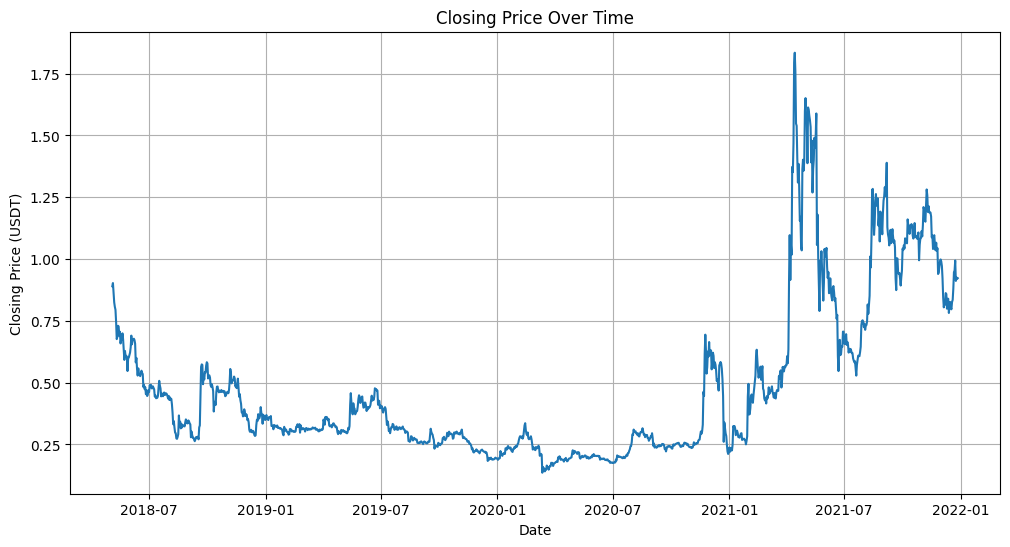

In [9]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USDT)')
plt.grid(True)
plt.show()

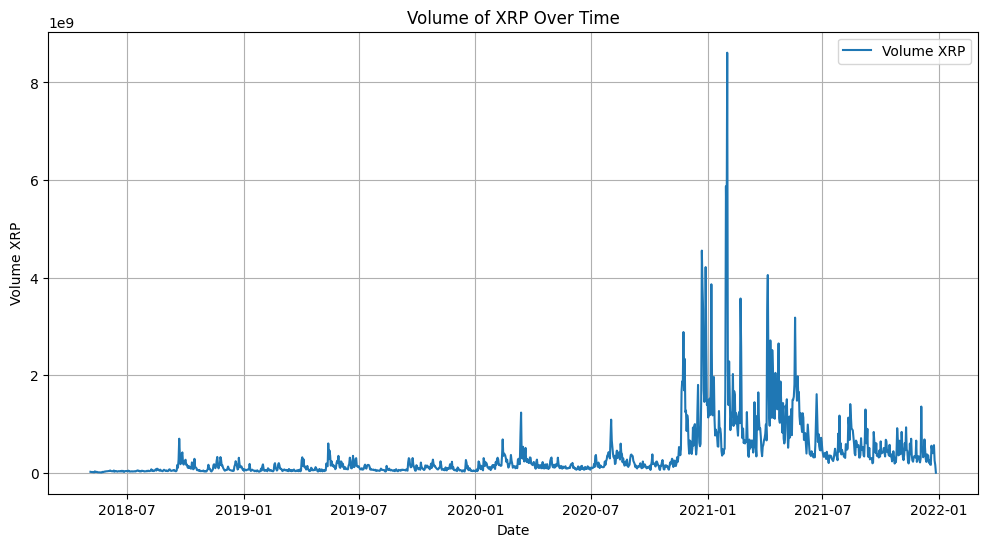

In [10]:
# Volume of XRP over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Volume XRP'], label='Volume XRP')
plt.title('Volume of XRP Over Time')
plt.xlabel('Date')
plt.ylabel('Volume XRP')
plt.legend()
plt.grid(True)
plt.show()

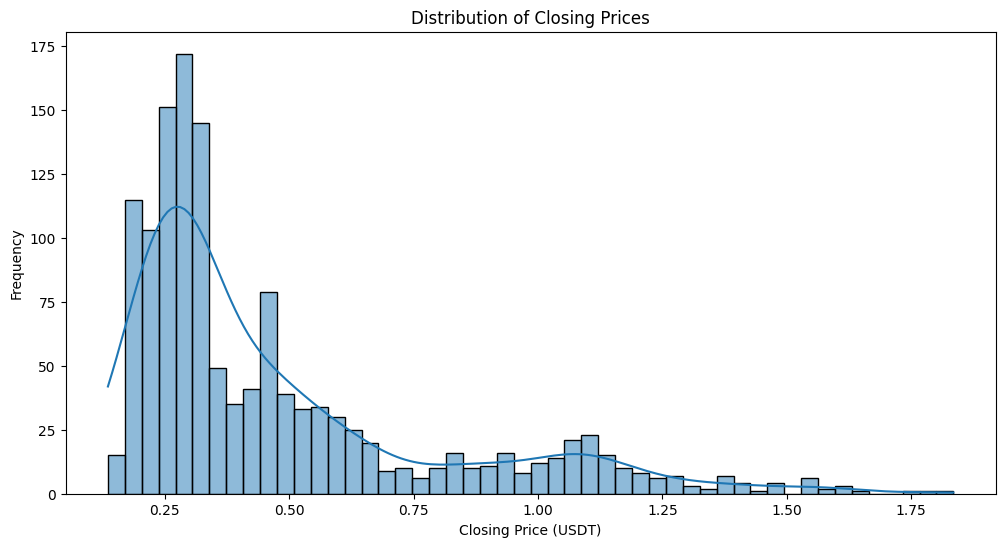

In [11]:
# Distribution of closing prices
plt.figure(figsize=(12, 6))
sns.histplot(df['close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price (USDT)')
plt.ylabel('Frequency')
plt.show()

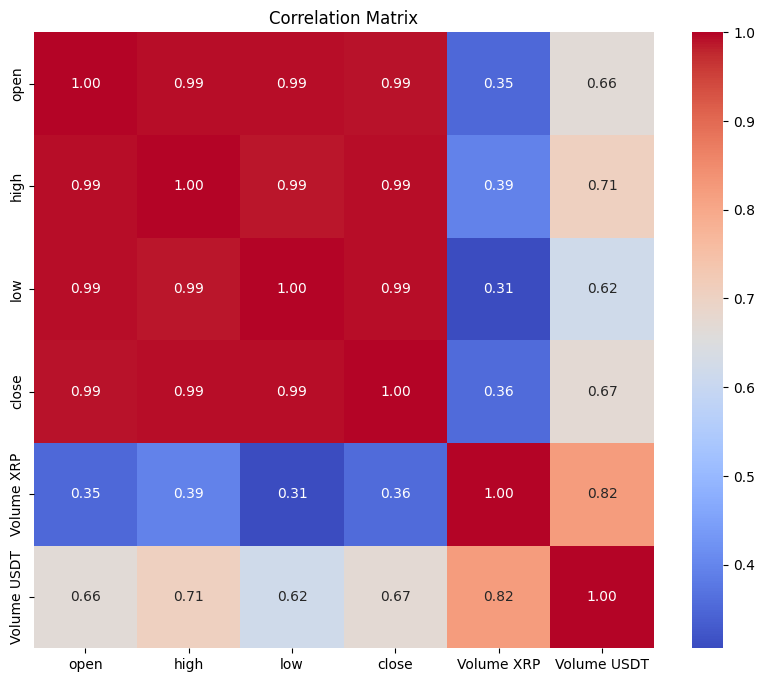

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df[['open', 'high', 'low', 'close', 'Volume XRP', 'Volume USDT']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Time Series Modeling with ARIMA

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df['close'][:train_size], df['close'][train_size:]

In [15]:
# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

In [16]:
# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1067
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1782.988
Date:                Thu, 25 Jul 2024   AIC                          -3553.977
Time:                        17:10:04   BIC                          -3524.147
Sample:                             0   HQIC                         -3542.674
                               - 1067                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0644      0.018     -3.565      0.000      -0.100      -0.029
ar.L2          0.0021      0.016      0.131      0.896      -0.029       0.033
ar.L3          0.0165      0.012      1.354      0.1

In [17]:
# Make predictions
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


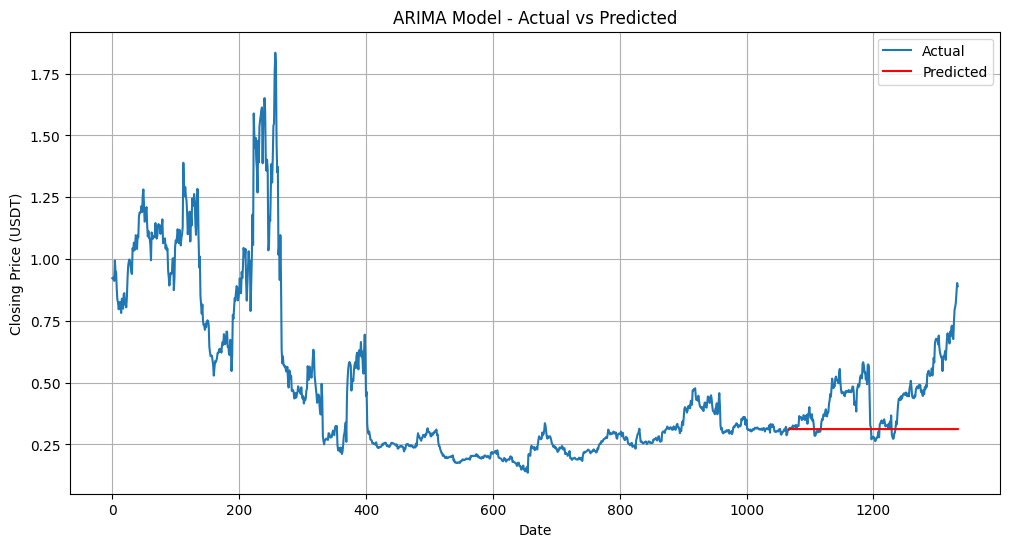

In [18]:
# Plot the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Actual')
plt.plot(df.index[start:end+1], predictions, color='red', label='Predicted')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Calculate and print the mean squared error
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.03538190888201755
